<a href="https://colab.research.google.com/github/MirandaCarou/Quantum_Algorithims_Programming/blob/main/Bernstein-Vazirani_Algorithim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIRANDA CAROU LAIÑO**

# Práctica 3: algoritmo de Bernstein-Vazirani

Implementa en Qiskit el algoritmo de Bernstein-Vazirani para un $n$ y un $s$ con el oráculo implementado en el ejercicio 5.

Obtén la salida y comprueba que puede encontrar el valor de $s$.

In [1]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=d23e37efe045db545b560ee46b36155a7359b251d4521a66c193b5e1ab109b2c
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
import numpy as np
from math import sqrt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

def obten_unitaria(qcirc, etiqueta):
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

In [4]:
# Obtenemos s como una lista de valores binarios aleatoria
def get_s(n):
    s = list()
    for q in range(n):
        if np.random.randint(2) == 1:
            s.append(1)
        else:
            s.append(0)
    return(s)

In [5]:
def bv_oraculo(n):
    """
    Devuelve un oraculo para el algoritmo de Bernstein-Vazirani

        n: Número de cúbits de entrada
        return: circuito de n+1 cúbit en forma de puerta
    """
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)
    s = get_s(n)
    print(s)

    # El oráculo puede implementarse con puertas CNOT controladas
    # por los cúbits para los que el bit en s vale 1

    sinv = s[::-1] # Invertimos s para recorrerlo del bit menos al más significativo

    for p in range(n):
      if sinv[p] == 1:
        qc.cx(x[p],y)

    # Salida
    oraculo = qc.to_gate()
    oraculo.name = "$U_{bernstein}$"
    return oraculo

In [6]:
def algoritmo_bernstein_Vazirani(n):
    qc = QuantumCircuit(n+1,n)
    qc.x(n)
    qc.barrier()

    qc.h(range(n))
    qc.h(n)

    qc = qc.compose(bv_oraculo(n))
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

[0, 1, 1, 0]


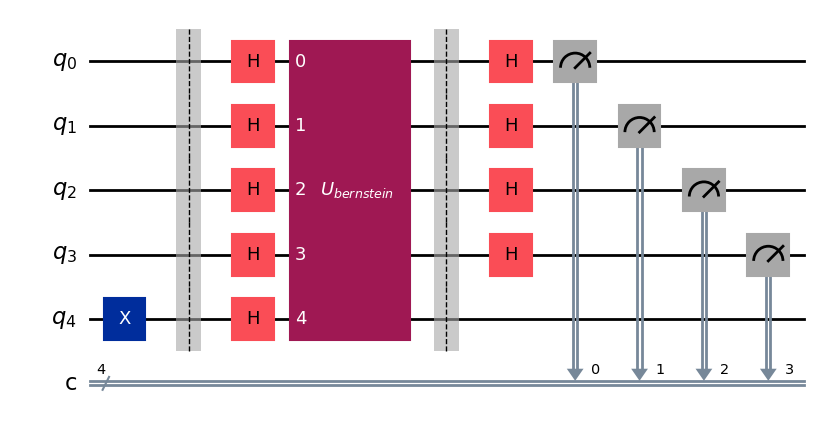

In [9]:
tipo_oraculo = 0
bv_circuito = algoritmo_bernstein_Vazirani(4)
bv_circuito.draw('mpl')

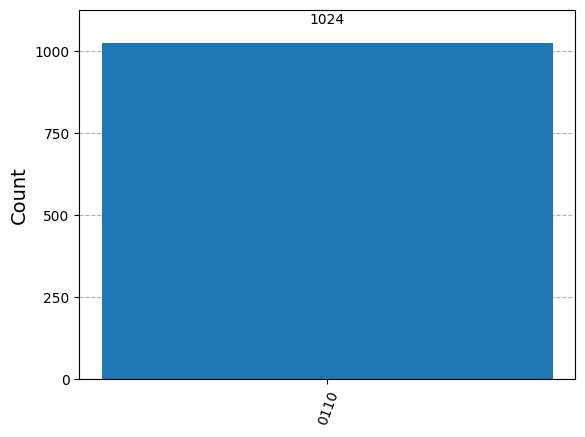

In [10]:
sim = AerSimulator(method='automatic')
qc_obj = transpile(bv_circuito, sim)
result = sim.run(qc_obj, shots=1024).result()
salida = result.get_counts()
plot_histogram(salida)

-----------------------------
-----------------------------
-----------------------------